In [ ]:
%matplotlib inline


PyTorch: nn
------------

本小节仍然实现一个具有隐藏层的完全连接的ReLU网络，经过训练可以通过最小化平方欧氏距离来从x预测y。

但我们使用来自PyTorch的nn包来构建网络。 PyTorch autograd使定义计算图和获取梯度变得容易，但是原始autograd对于定义复杂的神经网络并不能满足要求。 这是nn包可以提供帮助的地方。 nn包定义了一组模块，我们可以将其视为神经网络层，该神经网络层从输入产生输出并且具有一些可训练的权重。




In [5]:
import torch
import matplotlib.pyplot as plt


# N是批量大小，D_in是输入维度;
# H是隐藏层维度，D_out是输出维度。
N, D_in, H, D_out = 64, 1000, 100, 10

# # 创建随机输入和输出张量
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# 使用nn包将模型定义为一系列层序列nn.Sequential
# 是一个包含其他模块的模块，并将它们依次应用于序列产生其输出。 
# 每个线性模块使用一个线性函数，并保持其内部Tensor的权重和偏差。

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

# nn软件包还包含流行的损失函数的定义； 在这种情况下，我们将使用均方误差（MSE）作为损失函数。
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-4

#创建图并命名
plt.figure('Loss')
iter_plot = []
loss_plot = []
for t in range(500):
    # 正向传递：通过将x传递给模型来计算预测的y。 
    # 模块对象会覆盖__call__运算符，因此您可以像调用函数一样调用它们。 
    # 这样做时，您将输入数据的张量传递给模块，它会产生输出数据的张量。
    y_pred = model(x)

    #计算和打印损失。 我们传递包含y的预测值和真实值的Tensor，损失函数返回包含损失的Tensor。
    loss = loss_fn(y_pred, y)
    iter_plot.append(t)
    loss_plot.append(loss)
    print(t, loss.item())


    # 在进行反向通过之前将梯度归零。
    model.zero_grad()

    # 向后传递：计算损耗相对于模型的所有可学习参数的梯度。 
    # 在内部，每个模块的参数都存储在Tensors中，其中require_grad = True，
    # 因此此调用将计算模型中所有可学习参数的梯度。
    loss.backward()

    # 使用梯度下降更新权重。 每个参数都是张量，因此我们可以像以前一样访问其梯度。
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad

0 678.1014404296875
1 624.5280151367188
2 578.9412231445312
3 539.5462646484375
4 505.02001953125
5 474.3070373535156
6 446.47216796875
7 421.4273681640625
8 398.3629455566406
9 376.9101867675781
10 356.9157409667969
11 338.25860595703125
12 320.72882080078125
13 304.3431396484375
14 288.812255859375
15 274.0440979003906
16 259.9068298339844
17 246.4331817626953
18 233.58685302734375
19 221.3183135986328
20 209.59353637695312
21 198.38011169433594
22 187.6545867919922
23 177.41822814941406
24 167.67344665527344
25 158.37904357910156
26 149.53811645507812
27 141.1196746826172
28 133.1147918701172
29 125.51286315917969
30 118.3198013305664
31 111.51901245117188
32 105.10253143310547
33 99.04743194580078
34 93.34223937988281
35 87.95510864257812
36 82.8778305053711
37 78.08496856689453
38 73.56328582763672
39 69.28827667236328
40 65.26689910888672
41 61.48664093017578
42 57.91825866699219
43 54.555503845214844
44 51.39564514160156
45 48.42233657836914
46 45.627872467041016
47 43.003875732

381 9.422425500815734e-05
382 9.117233275901526e-05
383 8.822782547213137e-05
384 8.538101246813312e-05
385 8.261641050921753e-05
386 7.994467887328938e-05
387 7.736023690085858e-05
388 7.485711830668151e-05
389 7.243601430673152e-05
390 7.009494584053755e-05
391 6.783480785088614e-05
392 6.56448828522116e-05
393 6.352822674671188e-05
394 6.147984822746366e-05
395 5.9496054745977744e-05
396 5.7575656683184206e-05
397 5.571926158154383e-05
398 5.3925316024105996e-05
399 5.218485966906883e-05
400 5.050533582107164e-05
401 4.887997420155443e-05
402 4.7306213673437014e-05
403 4.578362131724134e-05
404 4.4310607336228713e-05
405 4.288506170269102e-05
406 4.150469248997979e-05
407 4.016816455987282e-05
408 3.887791172019206e-05
409 3.762768392334692e-05
410 3.6418659874470904e-05
411 3.524961357470602e-05
412 3.411610668990761e-05
413 3.302096592960879e-05
414 3.196253237547353e-05
415 3.0937586416257545e-05
416 2.994055103044957e-05
417 2.8981861760257743e-05
418 2.8050493710907176e-05
419 

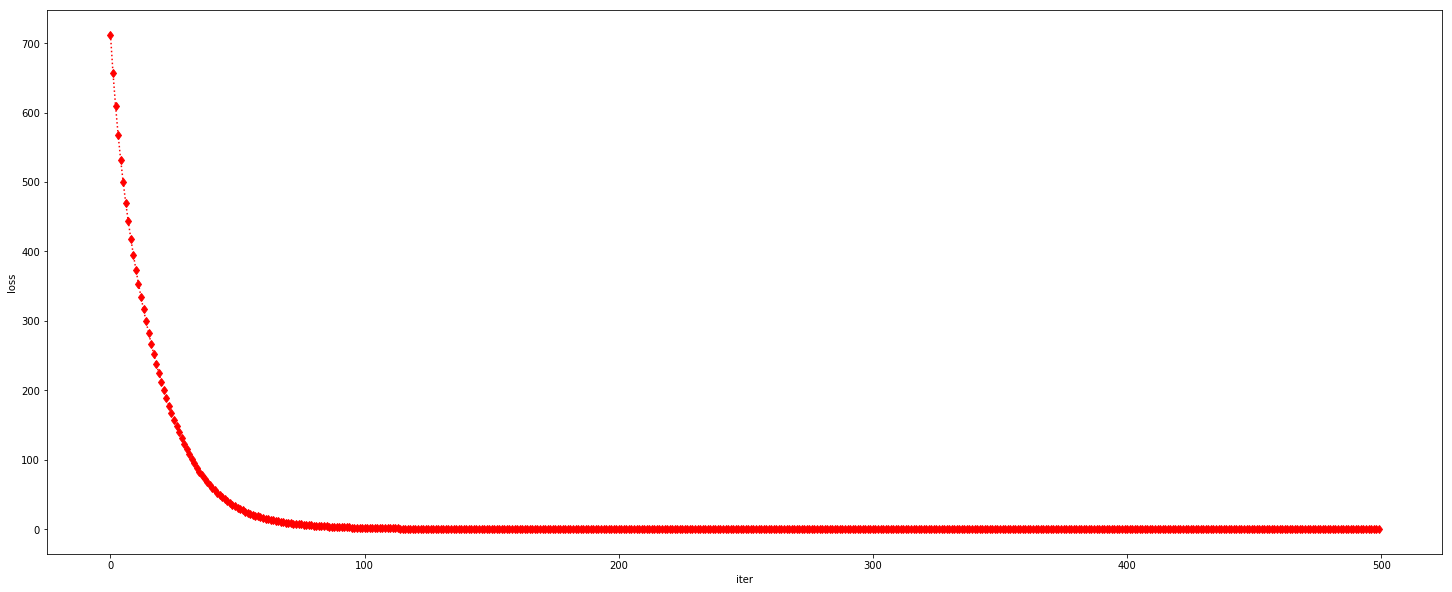

In [4]:
plt.figure(figsize=(25,10))
ax = plt.subplot()
#设置x轴、y轴名称
ax.set_xlabel('iter')
ax.set_ylabel('loss')
plt.plot(iter_plot,loss_plot,marker='d',linestyle=':',color='r')
plt.show()